In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches


pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('/Users/gianluigiboniglia/Downloads/lab_task.csv').drop('Unnamed: 0', axis=1)

In [3]:
df.head()

,match_id,event_type,team_name,start_frame,end_frame,success,norm_origin_pos_x,norm_origin_pos_y,norm_destination_pos_x,norm_destination_pos_y,pos_players_tracking,opp_players_tracking
0,5e307851c7946729bef63778,Pass,Team 21,12988,13005,Successful,0.480191,0.139984,0.480191,0.100046,"[{'norm_pos_y': 0.39588141176470587, 'speed_ms...","[{'norm_pos_y': 0.4970032941176471, 'speed_ms'..."
1,5e307851c7946729bef63778,Pass,Team 21,13005,13043,Successful,0.480191,0.100046,0.520163,0.220128,"[{'norm_pos_y': 0.3563470588235294, 'speed_ms'...","[{'norm_pos_y': 0.49727223529411757, 'speed_ms..."
2,5e307851c7946729bef63778,Pass,Team 21,13043,13075,Successful,0.520163,0.220128,0.490205,0.109997,"[{'norm_pos_y': 0.3281082352941176, 'speed_ms'...","[{'norm_pos_y': 0.4978101176470589, 'speed_ms'..."
3,5e307851c7946729bef63778,Drive,Team 21,13075,13100,Successful,0.493602,0.114569,0.497521,0.094264,"[{'norm_pos_y': 0.34209317647058823, 'speed_ms...","[{'norm_pos_y': 0.498348, 'speed_ms': 0.248407..."
4,5e307851c7946729bef63778,Drive,Team 21,13100,13125,Successful,0.497521,0.094264,0.501614,0.073555,"[{'norm_pos_y': 0.35392658823529416, 'speed_ms...","[{'norm_pos_y': 0.49875141176470594, 'speed_ms..."


In [4]:
unique_values = df['event_type'].unique()
print(f" {unique_values}")

 ['Pass' 'Drive' 'Shot']


In [5]:
result = df[(df['norm_origin_pos_x'] < 0.84) & 
            ((df['norm_destination_pos_x'] > 0.84) & 
             ((df['norm_destination_pos_y'] > 0.2) & (df['norm_destination_pos_y'] < 0.8)))][['norm_origin_pos_x', 'norm_destination_pos_x', 'norm_destination_pos_y']]

result

,norm_origin_pos_x,norm_destination_pos_x,norm_destination_pos_y
221,0.808417,0.879827,0.665629
350,0.710271,0.900292,0.520132
397,0.640254,0.910307,0.770248
460,0.798924,0.853875,0.759624
495,0.820260,1.030398,0.530218
...,...,...,...
24791,0.779934,0.950013,0.289726
24818,0.789949,1.010015,0.419759
24820,0.339803,0.889924,0.569829
24842,0.839936,1.010015,0.469782


In [6]:
def _point_to_meters_inverse(p, w=105, h=68):
    return np.array([p[0] * h, p[1] * w])

def _point_to_meters(p, w=105, h=68):
    return np.array([p[0] * w, p[1] * h])

def _draw_field(width=68, height=105, fig_size=8, lines_color="#bcbcbc", background_color="white"):
    ratio = width / float(height)
    f, ax = plt.subplots(1, 1, figsize=(fig_size * ratio, fig_size), dpi=100)

    if background_color: 
        ax.add_patch(patches.Rectangle((0, 0), width, height, color=background_color))

    line_pts = [
        [_point_to_meters([0, 0]), _point_to_meters([0, 1])],
        [_point_to_meters([1, 0]), _point_to_meters([1, 1])],
        [_point_to_meters([0, 1]), _point_to_meters([1, 1])],  
        [_point_to_meters([0, 0]), _point_to_meters([1, 0])],
    ]

    for line_pt in line_pts:
        ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], '-', alpha=0.8,
                lw=1.5, zorder=2, color=lines_color)

    line_pts = [
        [_point_to_meters([0.5, 0]), _point_to_meters([0.5, 1])],

        [[0, 24.85], [0, 2.85]],
        [[0, 13.85], [16.5, 13.85]],
        [[0, 54.15], [16.5, 54.15]],
        [[16.5, 13.85], [16.5, 54.15]],

        [[0, 24.85], [5.5, 24.85]],
        [[0, 43.15], [5.5, 43.15]],
        [[5.5, 24.85], [5.5, 43.15]],

        [[105, 24.85], [105, 2.85]],
        [[105, 13.85], [88.5, 13.85]],
        [[105, 54.15], [88.5, 54.15]],
        [[88.5, 13.85], [88.5, 54.15]],

        [[105, 24.85], [99.5, 24.85]],
        [[105, 43.15], [99.5, 43.15]],
        [[99.5, 24.85], [99.5, 43.14]]
    ]

    for line_pt in line_pts:
        ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], '-',
                alpha=0.8, lw=1.5, zorder=2, color=lines_color)
    
    # Circles
    ax.add_patch(patches.Wedge((94.0, 34.0), 9, 128, 232, fill=False, edgecolor=lines_color,
                               facecolor=lines_color, zorder=4, width=0.02))

    ax.add_patch(patches.Wedge((11.0, 34.0), 9, 308, 52, fill=False, edgecolor=lines_color,
                               facecolor=lines_color, zorder=4, width=0.02))

    ax.add_patch(patches.Wedge((52.5, 34), 9.5, 0, 360, fill=False, edgecolor=lines_color,
                               facecolor=lines_color, zorder=4, width=0.02))

    plt.axis('off')
    
    return f, ax

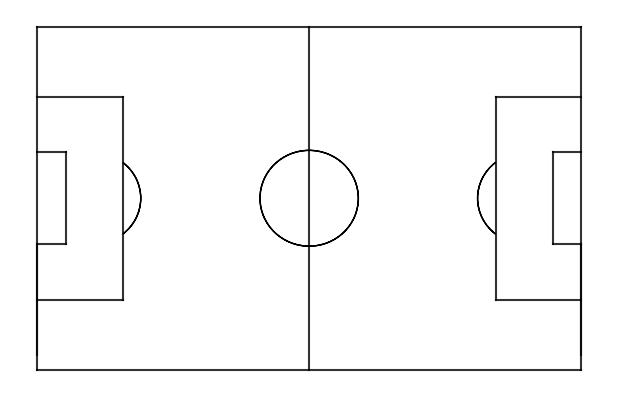

In [7]:
import matplotlib.pyplot as plt #we use this library to plot
import matplotlib.patches as patches #some more stuff to plot

ww=105 #here we define the "real" size of the football pitch in meters, hh=height and ww=width
hh=68

pitch_dim = np.array([ww,hh]) #we define a pitch dimension vector in case we want to unnormalize some positions (later!)

fig, ax = _draw_field(fig_size=5, width=ww, height=hh, lines_color='black') #football pitch figure and axis initialization

In [8]:
ww = 105  
hh = 68   


pitch_dim = np.array([ww, hh])

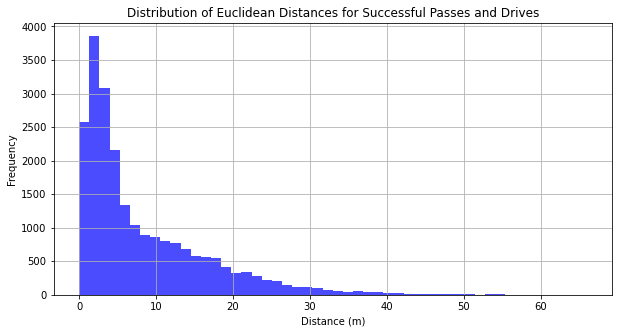

In [9]:
# Filtering successful Passes and Drives
successful_actions = df[(df['success'] == 'Successful') & (df['event_type'].isin(['Pass', 'Drive']))]

# Function to calculate Euclidean distance
def calculate_distance(row):
    origin = np.array([row['norm_origin_pos_x'], row['norm_origin_pos_y']]) * pitch_dim
    destination = np.array([row['norm_destination_pos_x'], row['norm_destination_pos_y']]) * pitch_dim
    return np.linalg.norm(destination - origin)

# Applying function to calculate distances
successful_actions['euclidean_distance'] = successful_actions.apply(calculate_distance, axis=1)

# Plotting the histogram
plt.figure(figsize=(10, 5))
successful_actions['euclidean_distance'].hist(bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Euclidean Distances for Successful Passes and Drives')
plt.xlabel('Distance (m)')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Define distance categories
def classify_distance(distance):
    if distance < 5:  # Short
        return 'Short'
    elif distance < 15:  # Mid-range
        return 'Mid-range'
    else:  # Long
        return 'Long'

# Applying classification
successful_actions['distance_category'] = successful_actions['euclidean_distance'].apply(classify_distance)

# Finding the number of actions per game
actions_count_per_game = successful_actions.groupby(['match_id', 'distance_category']).size().unstack(fill_value=0)

# Calculating percentages
percentage_actions = (actions_count_per_game.div(actions_count_per_game.sum(axis=1), axis=0) * 100).round(2)

print("Counts of Distance Categories per Game:")
print(actions_count_per_game)
print("\nPercentage of Distance Categories per Game:")
print(percentage_actions)

Counts of Distance Categories per Game:
distance_category         Long  Mid-range  Short
match_id                                        
5e307851c7946729bef63778   276        439    822
5e3093fec794679279a82426   248        379    619
5e30abd4c79467f7b182f41f   253        494    734
5e30c2fbc794675edf398f42   225        489    686
5e30d961c79467c5e8d7d659   262        460    813
5e310740c79467901e8e97fb   293        482    856
5e311c2ec79467f4b1c08875   309        450    755
5e313294c794675d9099e543   292        491    698
5e314a96c79467c3ceaf3976   227        336    515
5e3161ddc79467f04d26ab7a   254        400    676
5e319da4c79467dc14f1191e   340        481    737
5e31b628c79467b185551cc0   293        468    755
5e31ccafc79467215aecb4f5   340        659    828
5e31e400c79467892f2a4357   347        542    931
5e3307aec7946743523a442b   240        471    855

Percentage of Distance Categories per Game:
distance_category          Long  Mid-range  Short
match_id                        

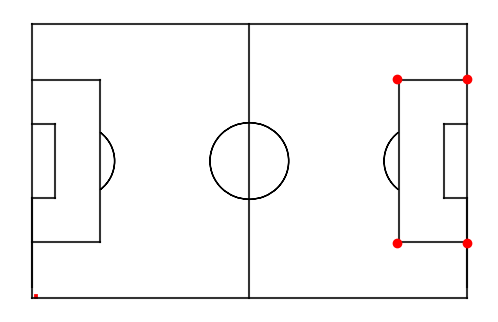

In [11]:
box_points = [(0.84, 0.2), (1, 0.2), (1, 0.8), (0.84, 0.8)]


fig, ax = _draw_field(fig_size=4, width=ww, height=hh, lines_color='black')


box_polygon = patches.Polygon(box_points, closed=True, fill=None, edgecolor='red', linewidth=2)
ax.add_patch(box_polygon)


for p in box_points:
    ax.scatter(p[0]*ww, p[1]*hh, c='red', zorder=3)


plt.show()

In [12]:
def check_outside_to_box(row):
   
    origin_x = row['norm_origin_pos_x']
    origin_y = row['norm_origin_pos_y']
    destination_x = row['norm_destination_pos_x']
    destination_y = row['norm_destination_pos_y']
    
    #Checking if the origin position is outside the box
    origin_out_of_box = (origin_x < 0.84) or (origin_x > 0.84 and (origin_y < 0.2 or origin_y > 0.8))
    
    #Checking if the destination is inside the box
    destination_in_box = (destination_x > 0.84) and (0.2 <= destination_y and destination_y <= 0.8)
    
    
    return origin_out_of_box and destination_in_box

In [14]:
#Applying the function to the DataFrame
successful_actions['check_outside_to_box'] = successful_actions.apply(check_outside_to_box, axis=1)


successful_actions[['match_id', 'event_type', 'check_outside_to_box']]

,match_id,event_type,check_outside_to_box
0,5e307851c7946729bef63778,Pass,False
1,5e307851c7946729bef63778,Pass,False
2,5e307851c7946729bef63778,Pass,False
3,5e307851c7946729bef63778,Drive,False
4,5e307851c7946729bef63778,Drive,False
...,...,...,...
24943,5e3307aec7946743523a442b,Pass,False
24944,5e3307aec7946743523a442b,Drive,False
24945,5e3307aec7946743523a442b,Pass,False
24946,5e3307aec7946743523a442b,Drive,False


In [15]:
successful_actions['check_outside_to_box'].value_counts()

False    22232
True       288
Name: check_outside_to_box, dtype: int64

In [16]:
#Get the percentage of the successful pass/drive about the function
percentage_true_0 = successful_actions['check_outside_to_box'].mean() * 100 
print(f"Percentage of True: {percentage_true_0:.2f}%")

Percentage of True: 1.28%


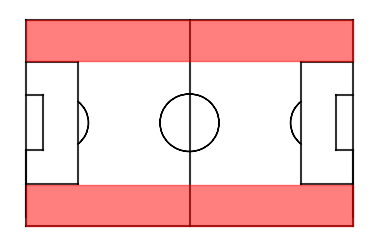

In [71]:
fig, ax = _draw_field(fig_size=3, width=ww, height=hh, lines_color='black')
rect1 = patches.Rectangle((0, 0), ww, 0.2*hh, linewidth=1, edgecolor='r', facecolor='r', alpha=.5, zorder=10)
rect2 = patches.Rectangle((0, hh), ww, -0.2*hh, linewidth=1, edgecolor='r', facecolor='r', alpha=.5, zorder=10)
ax.add_patch(rect1)
ax.add_patch(rect2)
plt.show()

In [18]:
def check_inner_to_wide(row):
    
    #I care just about y coordinate, It's the only one i need it to identify the red part
    
    origin_y = row['norm_origin_pos_y']
    destination_y = row['norm_destination_pos_y']
    
    #Checking if origin_y is in the 'white space'/outside the 'red space'
    origin_inner = (0.2 < origin_y < 0.8)
    
    #Checking if destination_y is in the 'red space'
    destination_wide = ((destination_y < 0.2 or destination_y > 0.8))
    
    
    return origin_inner and destination_wide

In [19]:
successful_actions['check_inner_to_wide'] = successful_actions.apply(check_inner_to_wide, axis=1)

successful_actions[['match_id', 'event_type', 'check_inner_to_wide']]

,match_id,event_type,check_inner_to_wide
0,5e307851c7946729bef63778,Pass,False
1,5e307851c7946729bef63778,Pass,False
2,5e307851c7946729bef63778,Pass,True
3,5e307851c7946729bef63778,Drive,False
4,5e307851c7946729bef63778,Drive,False
...,...,...,...
24943,5e3307aec7946743523a442b,Pass,True
24944,5e3307aec7946743523a442b,Drive,False
24945,5e3307aec7946743523a442b,Pass,False
24946,5e3307aec7946743523a442b,Drive,False


In [20]:
successful_actions['check_inner_to_wide'].value_counts()

False    20579
True      1941
Name: check_inner_to_wide, dtype: int64

In [21]:
percentage_true_1 = successful_actions['check_inner_to_wide'].mean() * 100  
print(f"Percentage of True: {percentage_true_1:.2f}%")

Percentage of True: 8.62%


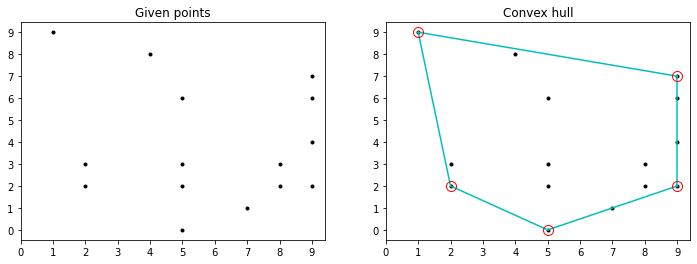

In [22]:
from scipy.spatial import ConvexHull #scipy import with convexhull tool

points = np.random.randint(0, 10, size=(15, 2))  # Random points in 2-D

hull = ConvexHull(points)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

for ax in (ax1, ax2):
    ax.plot(points[:, 0], points[:, 1], '.', color='k')
    if ax == ax1:
        ax.set_title('Given points')
    else:
        ax.set_title('Convex hull')
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'c')
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='r', color='none', lw=1, markersize=10)
    ax.set_xticks(range(10))
    ax.set_yticks(range(10))
plt.show()

In [23]:
#We take the first row of the dataframe
action_to_plot = df.loc[0]
action_to_plot

match_id                                           5e307851c7946729bef63778
event_type                                                             Pass
team_name                                                           Team 21
start_frame                                                           12988
end_frame                                                             13005
success                                                          Successful
norm_origin_pos_x                                                  0.480191
norm_origin_pos_y                                                  0.139984
norm_destination_pos_x                                             0.480191
norm_destination_pos_y                                             0.100046
pos_players_tracking      [{'norm_pos_y': 0.39588141176470587, 'speed_ms...
opp_players_tracking      [{'norm_pos_y': 0.4970032941176471, 'speed_ms'...
Name: 0, dtype: object

In [24]:
from numpy import nan


pos_positions = [] #this will be the position's list for the players in the attacking team
for player in eval(action_to_plot['pos_players_tracking']):
    position = np.array([player['norm_pos_x'], player['norm_pos_y']]) * pitch_dim #We define a position vector (x,y) for each player
    pos_positions.append(position) #and we append it to the list
    
opp_positions = [] #same with the opponent team
for player in eval(action_to_plot['opp_players_tracking']):
    position = np.array([player['norm_pos_x'], player['norm_pos_y']]) * pitch_dim
    opp_positions.append(position)
    
pos_positions = np.array(pos_positions) #we transform the lists into arrays
opp_positions = np.array(opp_positions)

hull = ConvexHull(opp_positions)

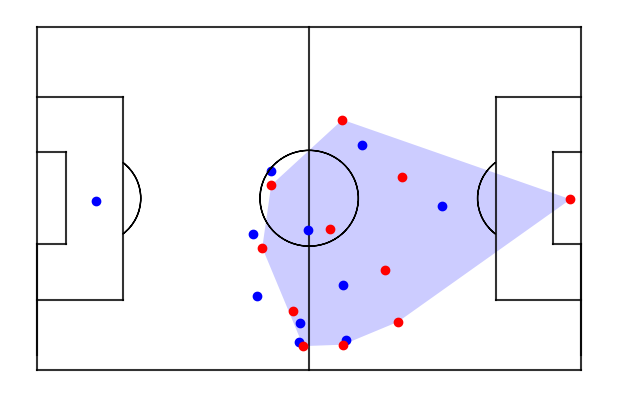

In [26]:
fig, ax = _draw_field(fig_size=5, width=ww, height=hh, lines_color='black')

ax.plot(pos_positions[:,0], pos_positions[:,1], 'o', color='blue')
ax.plot(opp_positions[:,0], opp_positions[:,1], 'o', color='red')
hull = ConvexHull(opp_positions) #we build the convex hull with the attackint team
ax.fill(opp_positions[hull.vertices,0], opp_positions[hull.vertices,1],'blue',alpha=0.2) #We can fill it with color
plt.show()

In [57]:
def check_convex_hull(row, hull):
    origin = np.array([row['norm_origin_pos_x']* pitch_dim[0], row['norm_origin_pos_y']* pitch_dim[1]])
    destination = np.array([row['norm_destination_pos_x']* pitch_dim[0], row['norm_destination_pos_y']* pitch_dim[1]])
    
    origin_inside = point_in_hull(origin, hull)
    destination_outside = not point_in_hull(destination, hull)
    
    return origin_inside and destination_outside

def point_in_hull(point, hull):
    return all(
        (np.dot(eq[:-1], point) + eq[-1] <= 0) for eq in hull.equations
    )

In [58]:
successful_actions['check_convex_hull'] = successful_actions.apply(lambda row: check_convex_hull(row, hull), axis=1)

successful_actions[['match_id', 'event_type', 'check_convex_hull']]

,match_id,event_type,check_convex_hull
0,5e307851c7946729bef63778,Pass,True
1,5e307851c7946729bef63778,Pass,False
2,5e307851c7946729bef63778,Pass,False
3,5e307851c7946729bef63778,Drive,False
4,5e307851c7946729bef63778,Drive,False
...,...,...,...
24943,5e3307aec7946743523a442b,Pass,False
24944,5e3307aec7946743523a442b,Drive,False
24945,5e3307aec7946743523a442b,Pass,False
24946,5e3307aec7946743523a442b,Drive,False


In [59]:
successful_actions['check_convex_hull'].value_counts()

False    21027
True      1493
Name: check_convex_hull, dtype: int64

In [60]:
percentage_true_hull = successful_actions['check_convex_hull'].mean() * 100  
print(f"Percentage of True: {percentage_true_hull:.2f}%")

Percentage of True: 6.63%


In [61]:
def check_convex_hull_versa(row, hull):
    origin = np.array([row['norm_origin_pos_x']* pitch_dim[0], row['norm_origin_pos_y']* pitch_dim[1]])
    destination = np.array([row['norm_destination_pos_x']* pitch_dim[0], row['norm_destination_pos_y']* pitch_dim[1]])
    
    origin_inside = not point_in_hull(origin, hull)
    destination_outside = point_in_hull(destination, hull)
    
    return origin_inside and destination_outside

def point_in_hull(point, hull):
    return all(
        (np.dot(eq[:-1], point) + eq[-1] <= 0) for eq in hull.equations
    )

In [62]:
successful_actions['check_convex_hull_versa'] = successful_actions.apply(lambda row: check_convex_hull_versa(row, hull), axis=1)

successful_actions[['match_id', 'event_type', 'check_convex_hull_versa']]

,match_id,event_type,check_convex_hull_versa
0,5e307851c7946729bef63778,Pass,False
1,5e307851c7946729bef63778,Pass,True
2,5e307851c7946729bef63778,Pass,False
3,5e307851c7946729bef63778,Drive,False
4,5e307851c7946729bef63778,Drive,False
...,...,...,...
24943,5e3307aec7946743523a442b,Pass,False
24944,5e3307aec7946743523a442b,Drive,False
24945,5e3307aec7946743523a442b,Pass,False
24946,5e3307aec7946743523a442b,Drive,False


In [63]:
successful_actions['check_convex_hull_versa'].value_counts()

False    20882
True      1638
Name: check_convex_hull_versa, dtype: int64

In [64]:
percentage_true_hull_versa = successful_actions['check_convex_hull_versa'].mean() * 100  
print(f"Percentage of True: {percentage_true_hull_versa:.2f}%")

Percentage of True: 7.27%


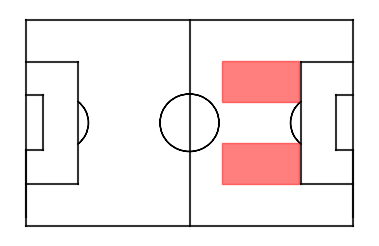

In [34]:
fig, ax = _draw_field(fig_size=3, width=ww, height=hh, lines_color='black')
rect1 = patches.Rectangle((0.6*ww, 0.2005*hh), 0.235*ww, 0.2005*hh, linewidth=1, edgecolor='r', facecolor='r', alpha=.5, zorder=10)
rect2 = patches.Rectangle((0.6*ww, 0.8005*hh), 0.235*ww, (0.8005-1)*hh, linewidth=1, edgecolor='r', facecolor='r', alpha=.5, zorder=10)
ax.add_patch(rect1)
ax.add_patch(rect2)
plt.show()

In [35]:
def check_position_inside_outside(row):
    
    origin_x = row['norm_origin_pos_x']
    origin_y = row['norm_origin_pos_y']
    destination_x = row['norm_destination_pos_x']
    destination_y = row['norm_destination_pos_y']
    
    #Define limits of the Rectangles
    rect1_left = 0.6
    rect1_right = rect1_left + 0.235
    rect1_bottom = 0.2
    rect1_top = rect1_bottom + 0.2005

    rect2_left = 0.6
    rect2_right = rect2_left + 0.235
    rect2_bottom = 0.8005
    rect2_top = 1.0  

    #Checking if the origin is outside the Rectangles
    origin_outside = not ((rect1_left <= origin_x <= rect1_right and rect1_bottom <= origin_y <= rect1_top) or 
                          (rect2_left <= origin_x <= rect2_right and rect2_bottom <= origin_y <= rect2_top))

    #Checking if the destination is inside the Rectangles
    destination_inside = ((rect1_left <= destination_x <= rect1_right and rect1_bottom <= destination_y <= rect1_top) or 
                          (rect2_left <= destination_x <= rect2_right and rect2_bottom <= destination_y <= rect2_top))

    return origin_outside and destination_inside

In [36]:
successful_actions['check_position_inside_outside'] = successful_actions.apply(check_position_inside_outside, axis=1)

successful_actions[['match_id', 'event_type', 'check_position_inside_outside']]

,match_id,event_type,check_position_inside_outside
0,5e307851c7946729bef63778,Pass,False
1,5e307851c7946729bef63778,Pass,False
2,5e307851c7946729bef63778,Pass,False
3,5e307851c7946729bef63778,Drive,False
4,5e307851c7946729bef63778,Drive,False
...,...,...,...
24943,5e3307aec7946743523a442b,Pass,False
24944,5e3307aec7946743523a442b,Drive,False
24945,5e3307aec7946743523a442b,Pass,False
24946,5e3307aec7946743523a442b,Drive,False


In [37]:
successful_actions['check_position_inside_outside'].value_counts()

False    21337
True      1183
Name: check_position_inside_outside, dtype: int64

In [38]:
percentage_true_2 = successful_actions['check_position_inside_outside'].mean() * 100  
print(f"Percentage di True: {percentage_true_2:.2f}%")

Percentage di True: 5.25%


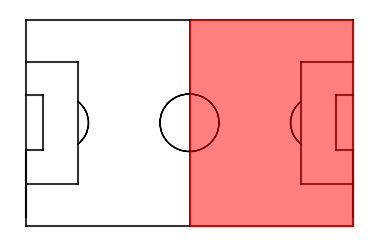

In [70]:
fig, ax = _draw_field(fig_size=3, width=ww, height=hh, lines_color='black')

rect = patches.Rectangle((0.5*ww, 0), 0.5*ww, hh, linewidth=1, edgecolor='r', facecolor='red', alpha=0.5, zorder=10)
ax.add_patch(rect)

plt.show()

In [40]:
def check_half_spaces(row):
    x_origin = row['norm_origin_pos_x']
    x_destination = row['norm_destination_pos_x']
    
    
    return x_origin >= 0.5 and x_destination >= 0.5

In [41]:
successful_actions['check_half_spaces'] = successful_actions.apply(check_half_spaces, axis=1)


successful_actions[['match_id', 'event_type', 'check_half_spaces']]

,match_id,event_type,check_half_spaces
0,5e307851c7946729bef63778,Pass,False
1,5e307851c7946729bef63778,Pass,False
2,5e307851c7946729bef63778,Pass,False
3,5e307851c7946729bef63778,Drive,False
4,5e307851c7946729bef63778,Drive,False
...,...,...,...
24943,5e3307aec7946743523a442b,Pass,False
24944,5e3307aec7946743523a442b,Drive,False
24945,5e3307aec7946743523a442b,Pass,False
24946,5e3307aec7946743523a442b,Drive,False


In [42]:
successful_actions['check_half_spaces'].value_counts()

False    11649
True     10871
Name: check_half_spaces, dtype: int64

In [46]:
percentage_true_3 = successful_actions['check_half_spaces'].mean() * 100  
print(f"Percentage of True: {percentage_true_3:.2f}%")

Percentage of True: 48.27%


In [43]:
successful_actions

,match_id,event_type,team_name,start_frame,end_frame,success,norm_origin_pos_x,norm_origin_pos_y,norm_destination_pos_x,norm_destination_pos_y,pos_players_tracking,opp_players_tracking,euclidean_distance,distance_category,check_outside_to_box,check_inner_to_wide,check_convex_hull,check_position_inside_outside,check_half_spaces
0,5e307851c7946729bef63778,Pass,Team 21,12988,13005,Successful,0.480191,0.139984,0.480191,0.100046,"[{'norm_pos_y': 0.39588141176470587, 'speed_ms...","[{'norm_pos_y': 0.4970032941176471, 'speed_ms'...",2.715768,Short,False,False,True,False,False
1,5e307851c7946729bef63778,Pass,Team 21,13005,13043,Successful,0.480191,0.100046,0.520163,0.220128,"[{'norm_pos_y': 0.3563470588235294, 'speed_ms'...","[{'norm_pos_y': 0.49727223529411757, 'speed_ms...",9.181095,Mid-range,False,False,False,False,False
2,5e307851c7946729bef63778,Pass,Team 21,13043,13075,Successful,0.520163,0.220128,0.490205,0.109997,"[{'norm_pos_y': 0.3281082352941176, 'speed_ms'...","[{'norm_pos_y': 0.4978101176470589, 'speed_ms'...",8.122719,Mid-range,False,True,False,False,False
3,5e307851c7946729bef63778,Drive,Team 21,13075,13100,Successful,0.493602,0.114569,0.497521,0.094264,"[{'norm_pos_y': 0.34209317647058823, 'speed_ms...","[{'norm_pos_y': 0.498348, 'speed_ms': 0.248407...",1.440753,Short,False,False,False,False,False
4,5e307851c7946729bef63778,Drive,Team 21,13100,13125,Successful,0.497521,0.094264,0.501614,0.073555,"[{'norm_pos_y': 0.35392658823529416, 'speed_ms...","[{'norm_pos_y': 0.49875141176470594, 'speed_ms...",1.472298,Short,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24943,5e3307aec7946743523a442b,Pass,Team 21,174893,174921,Successful,0.049634,0.399723,0.069663,0.189680,"[{'norm_pos_y': 0.7099469411764706, 'speed_ms'...","[{'norm_pos_y': 0.5984708235294118, 'speed_ms'...",14.436937,Mid-range,False,True,False,False,False
24944,5e3307aec7946743523a442b,Drive,Team 21,174921,174946,Successful,0.069141,0.189546,0.062348,0.165072,"[{'norm_pos_y': 0.6998616470588235, 'speed_ms'...","[{'norm_pos_y': 0.5756108235294117, 'speed_ms'...",1.810604,Short,False,False,False,False,False
24945,5e3307aec7946743523a442b,Pass,Team 21,174950,174971,Successful,0.059648,0.159693,0.139680,0.049696,"[{'norm_pos_y': 0.6825149411764706, 'speed_ms'...","[{'norm_pos_y': 0.5563815294117647, 'speed_ms'...",11.250038,Mid-range,False,False,False,False,False
24946,5e3307aec7946743523a442b,Drive,Team 21,174971,174996,Successful,0.142467,0.047948,0.135761,0.040956,"[{'norm_pos_y': 0.669471294117647, 'speed_ms':...","[{'norm_pos_y': 0.5425310588235294, 'speed_ms'...",0.849605,Short,False,False,False,False,False


In [66]:
print(f"Percentage of Pass/Drive from outside to inside the box: {percentage_true_0:.2f}%\n"
      f"Percentage of Pass/Drive from inner to wide: {percentage_true_1:.2f}%\n"
      f"Percentage of Pass/Drive from outside the half-spaces to inside half-spaces: {percentage_true_2:.2f}%\n"
      f"Percentage of Pass/Drive from inside the Convex Hull to outside: {percentage_true_hull:.2f}%\n"
      f"Percentage of Pass/Drive from outside the ConveHull to inside: {percentage_true_hull_versa:.2f}%\n"
      f"Percentage of Pass/Drive in the opponent half-pitch: {percentage_true_3:.2f}%")

Percentage of Pass/Drive from outside to inside the box: 1.28%
Percentage of Pass/Drive from inner to wide: 8.62%
Percentage of Pass/Drive from outside the half-spaces to inside half-spaces: 5.25%
Percentage of Pass/Drive from inside the Convex Hull to outside: 6.63%
Percentage of Pass/Drive from outside the ConveHull to inside: 7.27%
Percentage of Pass/Drive in the opponent half-pitch: 48.27%


Minimal Direct Attempts into the Box (1.28%):
The team shows a very cautious approach to penetrating the opposition's box, indicating they might prefer to build play rather than rushing into high-risk areas.

Moderate Use of Width (8.62%):
With a modest percentage of actions transitioning from the center to wide areas, the team aims to stretch the opponent's defense, facilitating lateral movement but not overly relying on crosses or wide play.

Exploitation of Half-Spaces (5.25%):
The percentage of passes from outside to inside the half-spaces suggests that the team is attempting to exploit these areas effectively, indicating a strategy to find pockets of space that can be crucial for creating goal-scoring opportunities.

Disruption through Convex Hull (6.63%):
Actions transitioning from inside the Hull to outside reflect the team's ability to manipulate the opponent's defensive structure, looking for openings after drawing them in.

Moving into the Hull (7.27%):
A notable percentage of passes or drives move into the Convex Hull, which indicates the team aims to assert control within defensive areas and potentially capitalize on defensive gaps.

Presence in Opponent's Half (48.27%):
Almost half of the team's actions occur in the opponent's half, highlighting a proactive approach to maintaining pressure and asserting dominance during offensive phases.